# Обучение без учителем

### Задание 1

In [21]:
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов 
# данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
boston = load_boston()
data = boston["data"]

print(boston["DESCR"][20:49])
print(f'Размер датасета {data.shape}')


Boston house prices dataset

Размер датасета (506, 13)


In [4]:
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_names)
test_scaled = pd.DataFrame(scaler.transform(X_test), columns=feature_names)
train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [13]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

In [24]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(train_scaled)
X_test_tsne = tsne.fit_transform(test_scaled)

print('До:\t{}'.format(train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


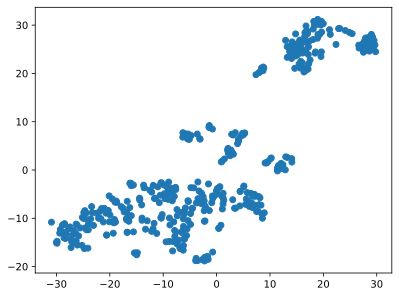

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

In [20]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.


In [22]:
from sklearn.cluster import KMeans

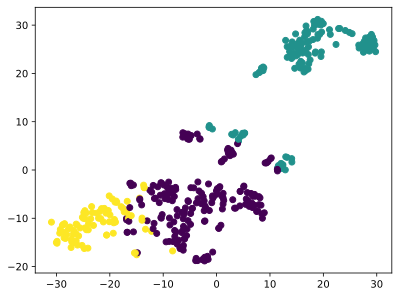

In [23]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [44]:
for i in range(3):
    print(f'Средняя цена {i+1} кластера: {y_train[labels_train == i].mean()}')
    print(f'Средний уровень преступности в {i+1} кластере: {X_train.loc[labels_train == i,"CRIM"].mean()}')

Средняя цена 1 кластера: price    24.958115
dtype: float64
Средний уровень преступности в 1 кластере: 0.4216602094240837
Средняя цена 2 кластера: price    16.165354
dtype: float64
Средний уровень преступности в 2 кластере: 10.797028425196851
Средняя цена 3 кластера: price    27.788372
dtype: float64
Средний уровень преступности в 3 кластере: 0.07356558139534884


### Задание 3

In [46]:
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


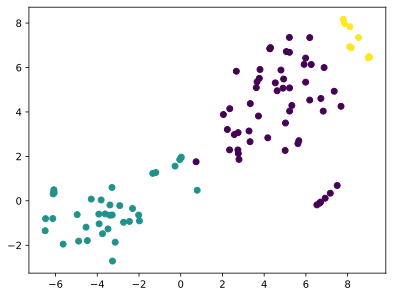

In [47]:
labels_test= kmeans.fit_predict(test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

In [48]:
for i in range(3):
    print(f'Средняя цена {i+1} кластера: {y_test[labels_test == i].mean()}')
    print(f'Средний уровень преступности в {i+1} кластере: {X_test.loc[labels_test == i,"CRIM"].mean()}')

Средняя цена 1 кластера: price    22.690909
dtype: float64
Средний уровень преступности в 1 кластере: 0.2192969090909091
Средняя цена 2 кластера: price    16.710526
dtype: float64
Средний уровень преступности в 2 кластере: 9.419181842105264
Средняя цена 3 кластера: price    34.311111
dtype: float64
Средний уровень преступности в 3 кластере: 0.04070333333333334


### Задание 4

In [50]:
# Обучите любую модель регрессии на этом же датасете. 
# Добавьте новый признак - метка кластера, которую вы уже получили применив модель кластеризации к этим данным. 
# Сравнить качество без метки кластера и с ней по отложенной выборке.

In [66]:
train_scaled['klaster'] = pd.DataFrame(labels_train)
test_scaled['klaster'] = pd.DataFrame(labels_test)
train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,klaster
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505,1
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474,0
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595,2
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387,1
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787,0


In [87]:

def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 50], [0, 50], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()
X_train_lr = train_scaled[feature_names]
X_train_lr_2 = train_scaled[train_scaled.columns]

y_train_lr = y_train['price']


R2:	0.751
RMSE:	4.652
MSE:	21.641


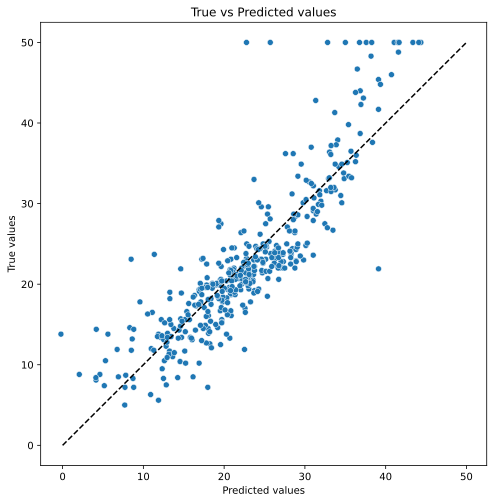

In [96]:
lr.fit(X_train_lr, y_train_lr)

y_pred = lr.predict(X_train_lr)

evaluate_preds(y_train_lr, y_pred)

R2:	0.751
RMSE:	4.649
MSE:	21.609


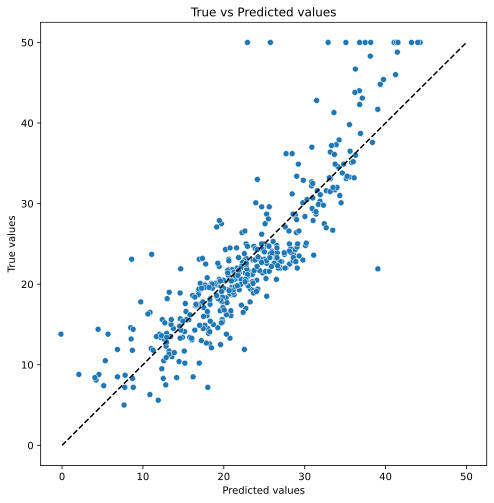

In [97]:
lr.fit(X_train_lr_2, y_train_lr)

y_pred_2 = lr.predict(X_train_lr_2)

evaluate_preds(y_train_lr, y_pred_2)